In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diamonds.csv')

In [ ]:
df = df.drop(columns='Unnamed: 0')

In [ ]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [ ]:
cat_columns = ['cut', 'color', 'clarity']
cont_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']
target_attribute = 'price'

In [ ]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
for col in cat_columns:
  print(col, ':', df[col].unique())

cut : ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color : ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity : ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [ ]:
x = df[cont_columns + cat_columns]
y = df[target_attribute]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [ ]:
scaler = StandardScaler()
oh_encoder = OneHotEncoder()

def preprocess_data(data, train=False):
  if train:
    scaler.fit(data[cont_columns])
    
  data[cont_columns] = scaler.transform(data[cont_columns])

  if train:
    oh_encoder.fit(data[cat_columns])

  cx = oh_encoder.transform(data[cat_columns]).toarray()
  new_data = data.drop(columns=cat_columns)
  new_data = np.hstack((new_data.to_numpy(), cx))
  return new_data


In [ ]:
train_x = preprocess_data(train_x, train=True)
test_x = preprocess_data(test_x)

In [ ]:
print('Train x Shape:', train_x.shape)
print('Train y Shape:', train_y.shape)
print('Test x Shape:', test_x.shape)
print('Test y Shape:', test_y.shape)

Train x Shape: (37758, 26)
Train y Shape: (37758,)
Test x Shape: (16182, 26)
Test y Shape: (16182,)


In [ ]:
model = tf.keras.Sequential([
    layers.Input(train_x.shape[1]),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1, activation='relu'),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1728      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 18,369
Trainable params: 18,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['MAE', 'MSE'])

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint('/content/transfer_learning_weights.h5', monitor='val_acc', save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode = 'min'), 
             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", mode = "min", patience=2)]
    
history = model.fit(train_x, train_y, epochs=20, batch_size=16, verbose=1, validation_split = 0.2, callbacks = callbacks)  



Epoch 1/20
1888/1888 [==============================] - 4s 2ms/step - loss: 390933.8438 - MAE: 325.6210 - MSE: 390933.8438 - val_loss: 424382.7812 - val_MAE: 336.7010 - val_MSE: 424382.7812 - lr: 0.0010
Epoch 2/20
1888/1888 [==============================] - 3s 2ms/step - loss: 385876.7812 - MAE: 324.7737 - MSE: 385876.7812 - val_loss: 401987.1875 - val_MAE: 331.7621 - val_MSE: 401987.1875 - lr: 0.0010
Epoch 3/20
1888/1888 [==============================] - 3s 2ms/step - loss: 375706.8750 - MAE: 321.2244 - MSE: 375706.8750 - val_loss: 404248.0000 - val_MAE: 339.9673 - val_MSE: 404248.0000 - lr: 0.0010
Epoch 4/20
1888/1888 [==============================] - 3s 2ms/step - loss: 376854.7812 - MAE: 322.6789 - MSE: 376854.7812 - val_loss: 389903.0312 - val_MAE: 330.2767 - val_MSE: 389903.0312 - lr: 0.0010
Epoch 5/20
1888/1888 [==============================] - 3s 2ms/step - loss: 373494.1562 - MAE: 320.0449 - MSE: 373494.1562 - val_loss: 433799.6562 - val_MAE: 335.9273 - val_MSE: 433799.656

In [ ]:
history.history.keys()

dict_keys(['loss', 'MAE', 'MSE', 'val_loss', 'val_MAE', 'val_MSE', 'lr'])

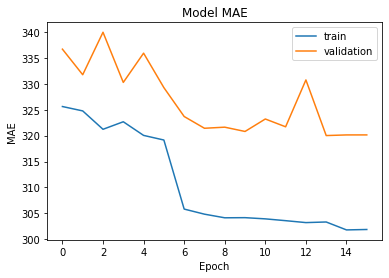

In [ ]:
plt.plot(history.history['MAE'])
plt.plot(history.history['val_MAE'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

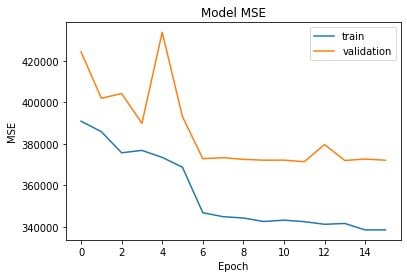

In [ ]:
plt.plot(history.history['MSE'])
plt.plot(history.history['val_MSE'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)

506/506 [==============================] - 1s 2ms/step - loss: 708416.6875 - MAE: 318.6695 - MSE: 708416.6875


[708416.6875, 318.66949462890625, 708416.6875]